## HACKER NEWS ANALYSIS
The goal of this project is to analyse our data to find out what type of posts generates the most comments as well as attracts the highest number of points. We will particular be looking at the 'Ask HN' posts and the 'Show HN' posts. We also want to determine the optimal time to make these posts to generate as many comments.

# Loading our data & importing pandas

Since we are going to be using pandas for this analysis, we are going to import pandas and load in our data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Above, we imported pandas as pd. Now we are going to load in our data using the `pd.read_csv` method. I have already checked our data frame and discovered that our created_at column is an object/string type and so I passed in argument that allowed us to convert it to a datetime object and then used the datetime `.strftime()` method to convert our datetime object back to a string showing only the hour.

In [2]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%H')
hn = pd.read_csv('HN_posts.csv', parse_dates = ['created_at'], date_parser = d_parser)

C:\Users\EGWUMA\AppData\Local\Temp/ipykernel_3004/943825079.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M').strftime('%H')


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Let's take a look at the first 10 rows of our dataframe using the hn.head() method.

In [4]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem cells to be classified as your own,http://www.regulations.gov/document?D=FDA-2015-D-3719-0018,1,0,altstar,03
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,03
2,12578997,What if we just printed a flatscreen television on the side of our boxes?,https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43,1,0,pavel_lishin,03
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext,1,0,poindontcare,03
4,12578979,How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake,https://www.talend.com/blog/2016/05/12/talend-and-Âthe-data-vaultÂ,1,0,markgainor1,03


We are going to use the hn.info() method to give us an overview of the dataframe. This method tells us how many rows and columns we have in our dataframe as well as the dtype of each column.

In [5]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


In [6]:
hn['title'].tail()

293114                                          Ask HN: What is/are your favorite quote(s)?
293115    Attention and awareness in stage magic: turning tricks into research (2008) [pdf]
293116                                                    Dying vets fuck you letter (2013)
293117                            PHP 7 Coolest Features: Space Ships, Type Hints, 2X Speed
293118            Toyota Establishes Research Centers with MIT and Stanford for AI Research
Name: title, dtype: object

Above we looked at the bottom 10 entries of our `hn['title']` series

# Getting Ask HN and Show HN Dataframe:
We created a filter by calling on the str class object on our `hn['title']` series and then using the str.contains() method on it. This returns a boolean value, true for titles with either Show HN or Ask HN and false for titles without them. When we apply that filter to our dataframe, it's going to return rows with either of Show HN or Ask HN.

In [7]:
hn[hn['title'].str.contains('Ask HN')].describe()

,id,num_points,num_comments
count,9.129000e+03,9129.000000,9129.000000
mean,1.138957e+07,11.326104,10.400044
std,7.024423e+05,41.969622,43.531249
min,1.017692e+07,1.000000,0.000000
25%,1.079341e+07,1.000000,1.000000
50%,1.137616e+07,3.000000,2.000000
75%,1.202123e+07,6.000000,6.000000
max,1.257891e+07,1213.000000,1007.000000


In [8]:
hn[hn['title'].str.contains('Show HN')].describe()

,id,num_points,num_comments
count,1.017800e+04,10178.000000,10178.000000
mean,1.131344e+07,14.872765,4.913048
std,6.983604e+05,51.129345,16.367128
min,1.017742e+07,1.000000,0.000000
25%,1.071216e+07,2.000000,0.000000
50%,1.125589e+07,3.000000,0.000000
75%,1.193813e+07,7.000000,2.000000
max,1.257834e+07,1624.000000,306.000000


Above we used the pandas describe() which gives us useful stats of numerical data in our dataframe. This method shows the count which is the number of entries, the mean, standard deviation, median, minimum, maximu value, etc. Above we can see that while there are more entries for Show HN, Ask HN generates more comments on average. Because we are concerned with the one that generates the most comments, we are going to be analysing our Ask HN dataframe.

# Analysing Ask HN

In [9]:
ask_hn = hn[hn['title'].str.contains('Ask HN')]

In [10]:
ask_hn.head(10)

,id,title,url,num_points,num_comments,author,created_at
10,12578908,Ask HN: What TLD do you use for local development?,NaN,4,7,Sevrene,02
42,12578522,Ask HN: How do you pass on your work when you die?,NaN,6,3,PascLeRasc,01
76,12577908,Ask HN: How a DNS problem can be limited to a geographic region?,NaN,1,0,kuon,22
80,12577870,Ask HN: Why join a fund when you can be an angel?,NaN,1,3,anthony_james,22
102,12577647,Ask HN: Someone uses stock trading as passive income?,NaN,5,2,00taffe,21
167,12576946,"Ask HN: How hard would it be to make a cheap, hackable phone?",NaN,2,1,hkt,19
171,12576899,Ask HN: What is that one deciding factor that makes a website successful?,NaN,22,22,ziggystardust,19
215,12576398,Ask HN: Is the world really short of software developers?,NaN,2,3,chirau,17
267,12575803,Ask HN: Geolocalized public API?,NaN,1,0,andreapaiola,15
271,12575743,Ask HN: How to sell and idea?,NaN,12,13,hacknat,15


Let's  look at the number of comments and number of points generated from our ask hn dataframe as well as the time it was created.

In [11]:
ask_hn[['num_points', 'num_comments', 'created_at']].head()

,num_points,num_comments,created_at
10,4,7,02
42,6,3,01
76,1,0,22
80,1,3,22
102,5,2,21


# Sorting our dataframe:
We are going to use the sort_values method and sort the created_at, num_comments and num_points columns in our dataframe. We are going to sort the created_at in ascending orde while the num_comments and num_points will be in descending order because we want to see from the highest comments/points to the lowest one.

In [12]:
ask_hn = ask_hn.sort_values(['created_at', 'num_comments','num_points' ], ascending = [True, False, False])

In [13]:
ask_hn.head(50)

,id,title,url,num_points,num_comments,author,created_at
25252,12348756,"Ask HN: Failed interview, feeling unemployable and depressed what do I do?",NaN,377,234,deathbysw123,00
77264,11898992,Ask HN: Do you have a profitable side project? How long did it take to achieve?,NaN,310,197,laksmanv,00
16816,12421881,Ask HN: What does an electrical engineer actually do at work?,NaN,140,110,johan_larson,00
235133,10598766,"Ask HN: How do you track issues, todos, features?",NaN,75,74,karjaluoto,00
5680,12527922,Ask HN: Where do you go to get recruiters to find you a job?,NaN,89,61,nicholas73,00
213713,10765539,"Ask HN: A simple, low-tech way to reduce the package theft problem from homes?",NaN,16,59,DrScump,00
39927,12222656,Ask HN: Any experience with defiant children?,NaN,36,58,rymohr,00
218785,10724771,Ask HN: Why did OS X win out over Linux for so many developers?,NaN,33,53,coned88,00
271161,10336117,Ask HN: Dealing with a Toxic Co-Worker,NaN,42,51,NoIInTeam,00
183674,11008784,Ask HN: What are the best open source tools you use in your organization?,NaN,52,50,devcheese,00


# Grouping our data:
We are going to create a group object using pandas groupby() method. Since we want to know the hour that generates the most comments, we are going to group our data by our created_at column and then index our num_points and num_comments column and the use the mean() method to get the average points and comments for each our.

In [14]:
created_grp = ask_hn.groupby(['created_at'])

In [15]:
created_grp[['num_points', 'num_comments']].mean()

,num_points,num_comments
created_at,,
00,9.464883,7.575251
01,9.439716,7.407801
02,10.944238,11.137546
03,9.365314,7.963100
04,10.946281,9.743802
05,9.747619,8.766667
06,8.675214,6.782051
07,9.053333,7.040000
08,10.677043,9.190661


Let's use the nlargest() method to get the top 5 hours to make a post.

In [16]:
created_grp[['num_points', 'num_comments']].mean().nlargest(5, 'num_comments')

,num_points,num_comments
created_at,,
15,21.607419,28.633694
13,17.995475,16.350679
12,13.576023,12.380117
02,10.944238,11.137546
10,13.436170,10.684397


In [17]:
%matplotlib inline

In [18]:
avg_comments_points_by_hour = created_grp[['num_points', 'num_comments']].mean()

Text(0, 0.5, 'Hour Created')

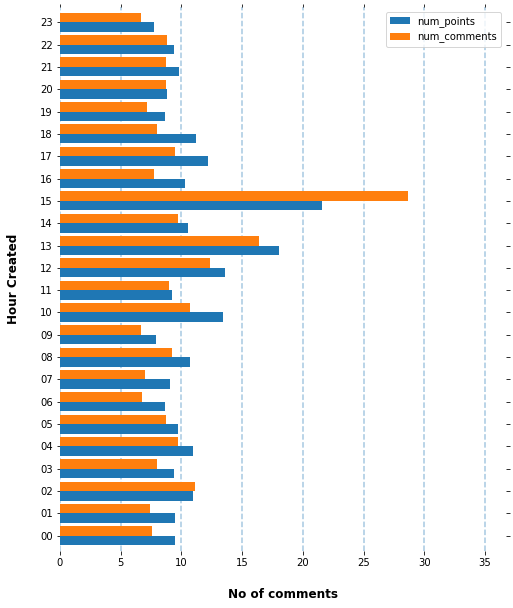

In [19]:
ax = avg_comments_points_by_hour.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.85)


 # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, zorder=1)

  # Set x-axis label
ax.set_xlabel("No of comments", labelpad=20, weight='bold', size=12)
    # Set y-axis label
ax.set_ylabel("Hour Created", labelpad=20, weight='bold', size=12)



In [20]:
hours = [15, 13, 12, 13,10]
average_comment = [28.63, 16.35,12.38, 11.14, 10.68]

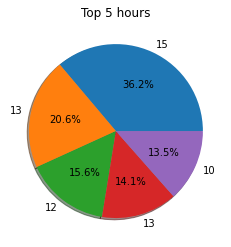

In [21]:
plt.pie(average_comment, labels = hours, shadow= True, autopct='%1.1f%%')
plt.title('Top 5 hours')
plt.show()

# Conclusion:
We can see that posts that generates the most comments are likely to generate the most points as well. And the top 5 hours for making a post are 3pm, 1pm, 12 noon, 2am and 10am. The timezone used for this analysis was the Eastern US time. So for persons living in Nigeria which is 5 hours ahead, the top 5 hours will be: 8pm, 6pm, 7pm, 7am and 5pm.
